In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

In [80]:
df = pd.read_csv(r"C:\Users\sneha\Desktop\data analyst portfolio projects\Python\loan approval prediction\Dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [81]:
df.shape

(614, 13)

In [82]:
df.columns # returns names of features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [83]:
#Feature 
df.info() #data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

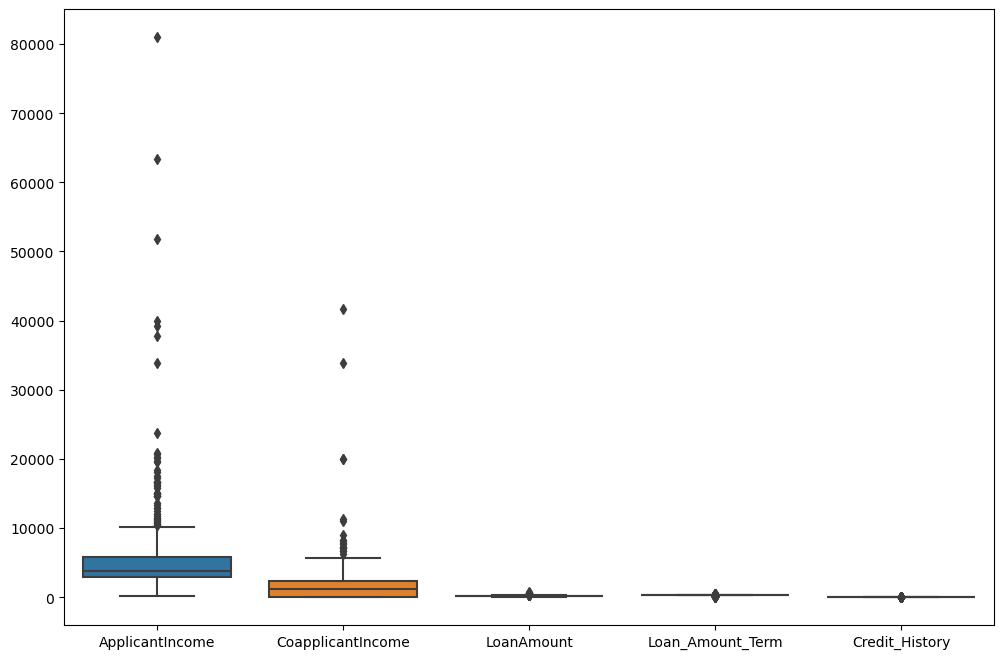

In [85]:
#checking the outliers (values which are different from the values in the table)
plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [86]:
#fill the null values of numerical datatypes - mean or median - because we have alot of outliers in applicantincome and coapplicantincome
#median is less sensitive to outliers

#df['LoanAmount'].median()
#df['LoanAmount'].mean()
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean()) #no outliers
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [87]:
#for fill object data types we use mode
#df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [88]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## VISUALIZATION

number of people who took loan by gender -
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

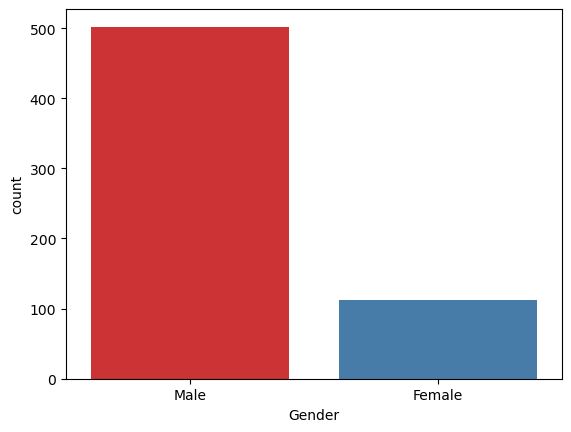

In [89]:
print('number of people who took loan by gender -')
print(df['Gender'].value_counts())
sns.countplot(x= 'Gender' ,data = df, palette = 'Set1')

number of people who took loan by gender -
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

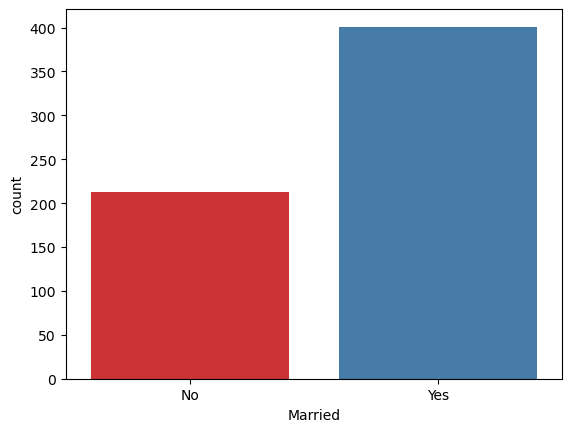

In [49]:
print('number of people who took loan by gender -')
print(df['Married'].value_counts())
sns.countplot(x= 'Married' ,data = df, palette = 'Set1')

number of people who took loan by gender -
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

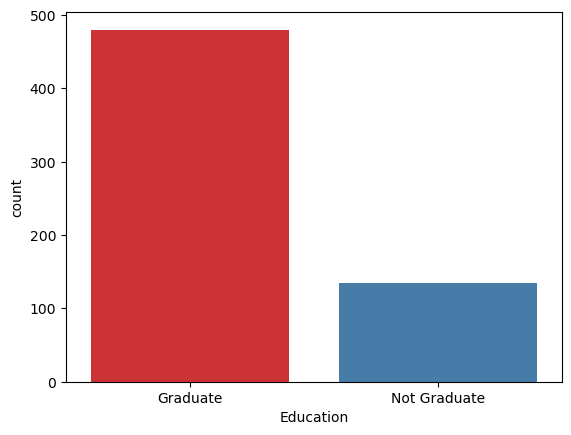

In [50]:
print('number of people who took loan by gender -')
print(df['Education'].value_counts())
sns.countplot(x= 'Education' ,data = df, palette = 'Set1')

number of people who took loan by gender -
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

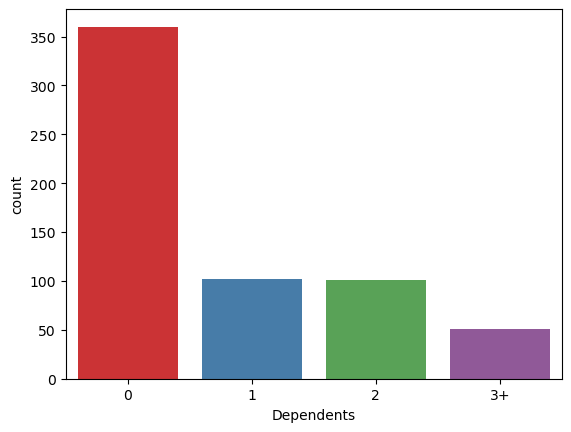

In [13]:
print('number of people who took loan by gender -')
print(df['Dependents'].value_counts())
sns.countplot(x= 'Dependents' ,data = df, palette = 'Set1')

In [70]:
## Co-relation
data = df.corr(numeric_only = True)
data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


In [93]:
'''
data = df.corr(numeric_only = True)
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(data,annot = True,cmap = 'BuPu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
'''

"\ndata = df.corr(numeric_only = True)\nplt.figure(figsize=(12, 6))\nheatmap = sns.heatmap(data,annot = True,cmap = 'BuPu')\nheatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)\n"

### Feature Engineering 

In [112]:
## total applicant income
df['Total_Applicant_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,Applicant_income_log,Loan_Amount_log,Loan_Amount_Term_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972811,4.276666,5.888878
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320448,3.713572,5.198497
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,8.996280,5.537334,5.888878
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933796,5.236442,5.888878


In [115]:
#droptable = df.drop('Total_Applicant',axis='columns')
#droptable

<Axes: xlabel='Applicant_income_log', ylabel='Density'>

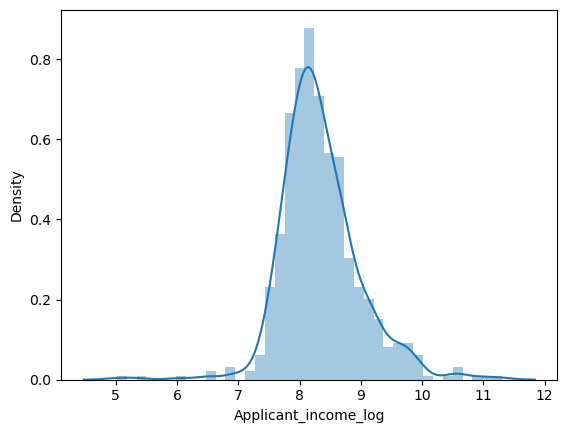

In [102]:
#Apply log transformation for scaling
df['Applicant_income_log']= np.log(df['ApplicantIncome'] + 1 )
sns.distplot(df['Applicant_income_log'])

<Axes: xlabel='Loan_Amount_log', ylabel='Density'>

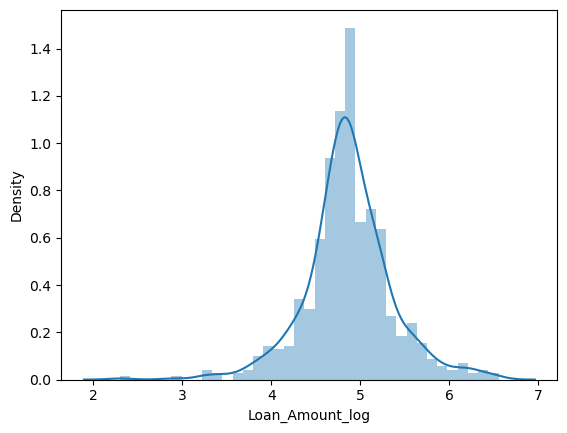

In [104]:
df['Loan_Amount_log']= np.log(df['LoanAmount'] + 1 )
sns.distplot(df['Loan_Amount_log'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

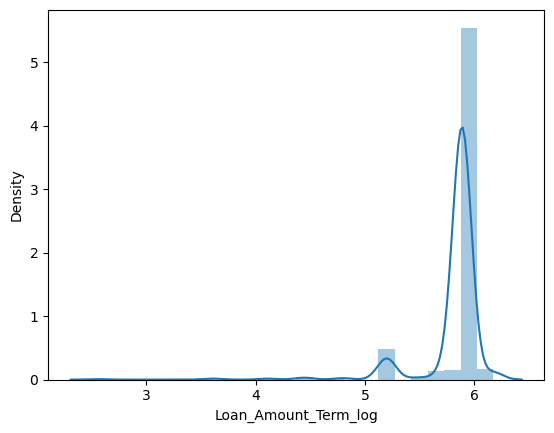

In [105]:
df['Loan_Amount_Term_log']= np.log(df['Loan_Amount_Term'] + 1 )
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Applicant_Income_log', ylabel='Density'>

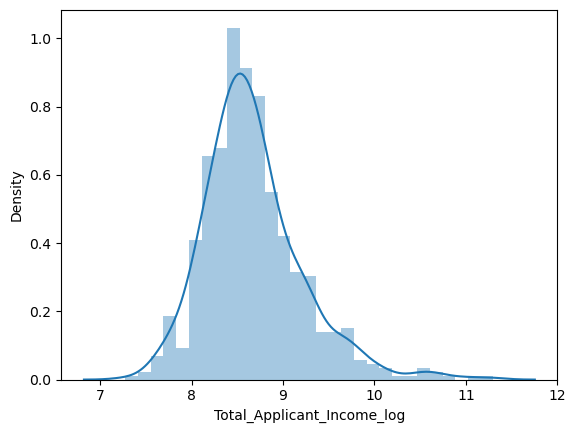

In [113]:
df['Total_Applicant_Income_log']= np.log(df['Total_Applicant_Income'] + 1 )
sns.distplot(df['Total_Applicant_Income_log'])

In [114]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,Applicant_income_log,Loan_Amount_log,Loan_Amount_Term_log,Total_Applicant_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972811,4.276666,5.888878,7.972811
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320448,3.713572,5.198497,8.320448
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,8.996280,5.537334,5.888878,9.025576
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933796,5.236442,5.888878,8.933796


In [122]:
## Dropping unnecessary column
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Applicant_Income','Loan_ID']
df = df.drop(columns= cols, axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_income_log,Loan_Amount_log,Loan_Amount_Term_log,Total_Applicant_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972811,4.276666,5.888878,7.972811
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320448,3.713572,5.198497,8.320448
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,8.996280,5.537334,5.888878,9.025576
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933796,5.236442,5.888878,8.933796


In [159]:
#converting categorical data to numerical 
#encoding technique - Labelencoding(incase of - gender,married(it will change data from male to 0 or 1, same goes with yes & no)), graduate
# one hot encoding - for state, province feature.

from sklearn.preprocessing import LabelEncoder
cols =['Gender', 'Married','Education','Self_Employed','Property_Area','Dependents','Loan_Status']
le = LabelEncoder()

for col in cols :
    df[col] = le.fit_transform(df[col])

In [160]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_income_log,Loan_Amount_log,Loan_Amount_Term_log,Total_Applicant_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,1,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,1,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,1,8.933796,5.236442,5.888878,8.933796


In [161]:
df.dtypes

Gender                          int64
Married                         int64
Dependents                      int32
Education                       int64
Self_Employed                   int64
Credit_History                float64
Property_Area                   int64
Loan_Status                     int64
Applicant_income_log          float64
Loan_Amount_log               float64
Loan_Amount_Term_log          float64
Total_Applicant_Income_log    float64
dtype: object

In [162]:
## Split independent and dependent features
## storing  independent in x
## storing dependent feature in y
## also we are creating two datasets
X = df.drop(columns = ['Loan_Status'], axis = 'columns')
Y = df['Loan_Status']

In [133]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Applicant_income_log,Loan_Amount_log,Loan_Amount_Term_log,Total_Applicant_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3+,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [163]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## Machine Learning

In [155]:
#cross val score - from which we can check score of our ML model
from sklearn.model_selection import train_test_split, cross_val_score
#accuracy score - model accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #can do both regression and classifier, but we are doing simple regression too.
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [164]:
## according train test split we will split our data set into training and testing
## 25% for testing
#random_state handles shuffling of value, assign any value
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state= 42)

In [193]:
##Logistic Regression
## whole data set using model1
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_model1)

#accuracy - ratio of corrected predicted value to the total values
accuracy*100


77.27272727272727

In [195]:
#cross_val_score, 5 indicate that data sets will be divided into 5 parts and then the score will be created
score = cross_val_score(model1,X,Y,cv = 5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [196]:
#cross validation after dividing the data set into 5 parts
np.mean(score)*100 

80.9462881514061

In [197]:
## DecisionTree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_model2)

print("accuracy of Decision Tree model : " , accuracy*100)

accuracy of Decision Tree model :  71.42857142857143


In [198]:
score = cross_val_score(model2,X,Y,cv = 5)
print("cross validation score of Decision Tree model : " , np.mean(score)*100)

cross validation score of Decision Tree model :  71.17552978808477


In [199]:
## RandomForest Classifier , we dont need to check cross validation here, because it is already split randomly
model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_model3)

print("accuracy of RandomForest Classifier : " , accuracy*100)

accuracy of RandomForest Classifier :  79.87012987012987


In [200]:
## KNeighbors Classifier, neighbors around data set, we are giving 3, if there are 1 present around ds it will 1, if 0 is present it will give 0)
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,Y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_model4)

print("accuracy of KNeighbors Classifier : " , accuracy*100)

accuracy of KNeighbors Classifier :  71.42857142857143


In [201]:
score = cross_val_score(model4,X,Y,cv = 5)
print("cross validation score of KNeighbors Classifier(KNearest Neighbors) : " , np.mean(score)*100)

cross validation score of KNeighbors Classifier(KNearest Neighbors) :  73.61721977875517


In [210]:
from sklearn.metrics import classification_report

def generateclassificationreport(model_name,Y_test, y_pred):
    report = classification_report(Y_test, y_pred)
    nl = '\n'
    print(f"Classification report for {model_name}:{nl} {report} {nl}")

generateclassificationreport(model1,Y_test,y_pred_model1)
generateclassificationreport(model2,Y_test,y_pred_model2)
generateclassificationreport(model3,Y_test,y_pred_model3)
generateclassificationreport(model4,Y_test,y_pred_model4)

Classification report for LogisticRegression():
               precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154
 

Classification report for DecisionTreeClassifier():
               precision    recall  f1-score   support

           0       0.60      0.54      0.57        54
           1       0.76      0.81      0.79       100

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154
 

Classification report for RandomForestClassifier():
               precision    recall  f1-score   support

           0       0.93      0.46      0.62        54
           1       0.77      0.98      0.86       100

    accuracy           

In [211]:
#checking whether imbalancing error are there or not, it seems like difference is large so we will do sampling
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [214]:
#sampling - oversampling, undersampling
#pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [216]:
oversample = RandomOverSampler(random_state= 50)
X_resample,Y_resample = oversample.fit_resample(X,Y)
df_resample = pd.concat([pd.DataFrame(X_resample, columns=X.columns), pd.Series(Y_resample, name='Loan_Status')], axis=1)

In [217]:
X_resample

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Applicant_income_log,Loan_Amount_log,Loan_Amount_Term_log,Total_Applicant_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,0,0,0,0,0.0,0,8.745762,5.347108,5.888878,9.277999
840,1,1,1,0,0,0.0,0,7.933080,4.990433,5.888878,8.456381
841,1,1,2,0,0,0.0,2,9.082507,5.556828,5.888878,9.082507
842,1,1,1,0,1,0.0,2,9.260463,5.081404,5.198497,9.572480


In [218]:
Y_resample

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int64

In [220]:
Y_resample.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [221]:
X_resample_train, X_resample_test, Y_resample_train, Y_resample_test = train_test_split(X_resample,Y_resample,test_size = 0.25, random_state= 42)

In [222]:
##Logistic Regression
## whole data set using model1
model1 = LogisticRegression()
model1.fit(X_resample_train,Y_resample_train)
y_pred_model1 = model1.predict(X_resample_test)
accuracy = accuracy_score(Y_resample_test, y_pred_model1)

#accuracy - ratio of corrected predicted value to the total values
accuracy*100


66.35071090047393

In [224]:
#cross_val_score, 5 indicate that data sets will be divided into 5 parts and then the score will be created
score = cross_val_score(model1,X_resample,Y_resample,cv = 5)
score

np.mean(score)*100 

69.7865595942519

In [225]:
## DecisionTree Classifier
model2 = DecisionTreeClassifier()
model2.fit(X_resample_train,Y_resample_train)
y_pred_model2 = model2.predict(X_resample_test)
accuracy = accuracy_score(Y_resample_test, y_pred_model2)

print("accuracy of Decision Tree model : " , accuracy*100)

accuracy of Decision Tree model :  80.09478672985783


In [226]:
## RandomForest Classifier , we dont need to check cross validation here, because it is already split randomly
model3 = RandomForestClassifier()
model3.fit(X_resample_train,Y_resample_train)
y_pred_model3 = model3.predict(X_resample_test)
accuracy = accuracy_score(Y_resample_test, y_pred_model3)

print("accuracy of RandomForest Classifier : " , accuracy*100)

accuracy of RandomForest Classifier :  84.36018957345972


In [227]:
## KNeighbors Classifier, neighbors around data set, we are giving 3, if there are 1 present around ds it will 1, if 0 is present it will give 0)
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resample_train,Y_resample_train)
y_pred_model4 = model4.predict(X_resample_test)
accuracy = accuracy_score(Y_resample_test, y_pred_model4)

print("accuracy of KNeighbors Classifier : " , accuracy*100)

accuracy of KNeighbors Classifier :  70.14218009478674


In [228]:
from sklearn.metrics import classification_report

def generateclassificationreport(model_name,Y_resample_test, y_pred):
    report = classification_report(Y_resample_test, y_pred)
    nl = '\n'
    print(f"Classification report for {model_name}:{nl} {report} {nl}")

generateclassificationreport(model1,Y_resample_test,y_pred_model1)
generateclassificationreport(model2,Y_resample_test,y_pred_model2)
generateclassificationreport(model3,Y_resample_test,y_pred_model3)
generateclassificationreport(model4,Y_resample_test,y_pred_model4)

Classification report for LogisticRegression():
               precision    recall  f1-score   support

           0       0.85      0.46      0.59       114
           1       0.59      0.91      0.71        97

    accuracy                           0.66       211
   macro avg       0.72      0.68      0.65       211
weighted avg       0.73      0.66      0.65       211
 

Classification report for DecisionTreeClassifier():
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       114
           1       0.78      0.78      0.78        97

    accuracy                           0.80       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.80      0.80      0.80       211
 

Classification report for RandomForestClassifier():
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       114
           1       0.80      0.89      0.84        97

    accuracy           